In [1]:
from os.path import join as pathjoin
from data_processing import *
from interpretation import *
from models import *
from training import *

In [2]:
DATA_DIR = '/home/mlepekhin/data/min_gpt_bpe'
MODELS_DIR = '/home/mlepekhin/models'
MODEL_ID = 'allennlp_bert_base_cased'
CHECKPOINTS_DIR = pathjoin(MODELS_DIR, MODEL_ID, 'checkpoints')
BEST_MODEL = pathjoin(CHECKPOINTS_DIR, 'best.th')

In [3]:
transformer_model = 'bert-base-cased'
MAX_TOKENS = 512

### Loading of the pretrained model

In [4]:
vocab = Vocabulary().from_files(pathjoin(MODELS_DIR, MODEL_ID, 'vocab'))
model = build_transformer_model(vocab, transformer_model)

Building the model


In [5]:
id_to_label = vocab.get_index_to_token_vocabulary('labels')
print(id_to_label)
print(id_to_label.values())

{0: 'A1', 1: 'A12', 2: 'A7', 3: 'A16', 4: 'A8', 5: 'A22', 6: 'A4', 7: 'A11', 8: 'A14', 9: 'A9', 10: 'A17'}
dict_values(['A1', 'A12', 'A7', 'A16', 'A8', 'A22', 'A4', 'A11', 'A14', 'A9', 'A17'])


In [6]:
if torch.cuda.is_available():
    cuda_device = 1
else:
    cuda_device = -1
print(cuda_device)
model.load_state_dict(torch.load(BEST_MODEL, map_location=f'cuda:{cuda_device}'))

1


<All keys matched successfully>

### Data loading

In [7]:
en_test_df = pd.read_csv(pathjoin(DATA_DIR, 'en'))
en_test_df.head()

,Unnamed: 0,target,text
0,0,A4,"hot - water ; she now , and then she darted th..."
1,1,A4,"##hantom , his be a real education frequenters..."
2,2,A4,completed . The Mandarin uses his own allies f...
3,3,A4,"chiefs to Nazareth with John , their glances t..."
4,4,A4,"youngest , and see the mermaids , and then , a..."


In [8]:
true_classes = en_test_df.target.values
sentences = en_test_df.text.values

### Preliminary analysis

In [9]:
dataset_reader = build_transformer_dataset_reader(transformer_model, MAX_TOKENS)
predictor = TextClassifierPredictor(model, dataset_reader=dataset_reader)
predicted_classes = np.array(predict_classes(sentences, predictor, vocab))

In [10]:
print(type(predicted_classes == 'A1'))

<class 'numpy.ndarray'>


In [11]:
print(len(np.unique(true_classes)))

11


In [12]:
calc_classifier_metrics(predicted_classes, true_classes)

label (argum) f1_score 0.6530612244897959 precision 0.8 recall 0.5517241379310345
label (fictive) f1_score 0.9523809523809523 precision 1.0 recall 0.9090909090909091
label (instruct) f1_score 0.761904761904762 precision 0.8 recall 0.7272727272727273
label (reporting) f1_score 0.9047619047619048 precision 0.95 recall 0.8636363636363636
label (legal) f1_score 0.9189189189189189 precision 0.85 recall 1.0
label (personal) f1_score 0.5263157894736842 precision 0.5 recall 0.5555555555555556
label (commercial) f1_score 0.717948717948718 precision 0.7 recall 0.7368421052631579
label (research) f1_score 0.7499999999999999 precision 0.6 recall 1.0
label (info) f1_score 0.7317073170731706 precision 0.75 recall 0.7142857142857143
label (eval) f1_score 0.625 precision 0.5 recall 0.8333333333333334
label (stuff) f1_score 0.8260869565217392 precision 0.95 recall 0.7307692307692307
accuracy 0.7636363636363637


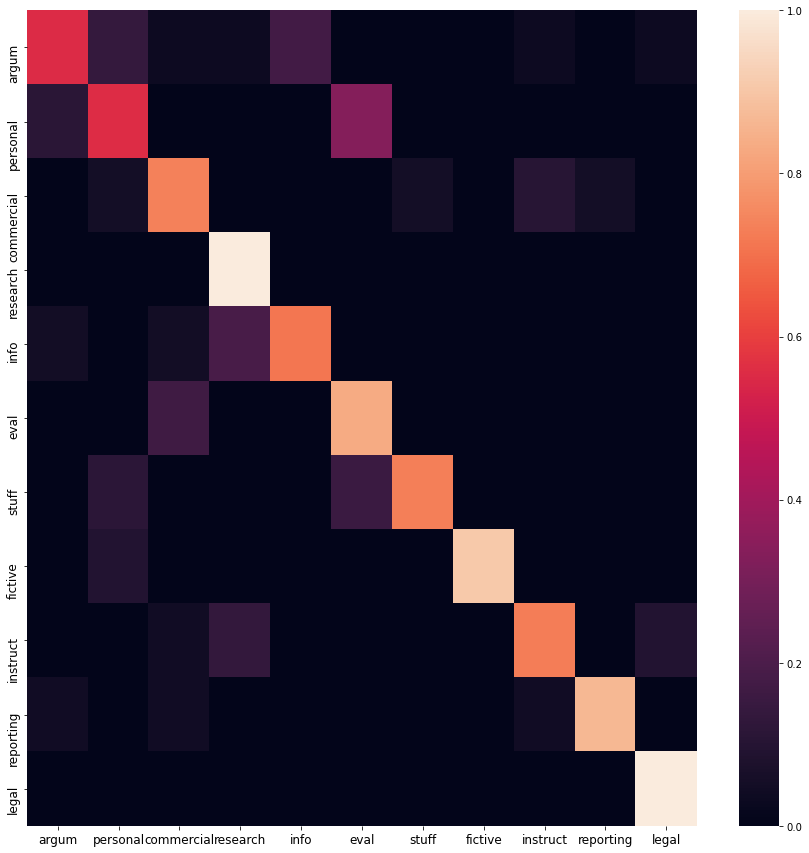

In [13]:
plot_confusion_matrix(predicted_classes, true_classes)

### Saliency Gradient Interpretation

In [14]:
smooth_grad = SmoothGradient(predictor)
simple_grad = SimpleGradient(predictor)
integrated_grad = IntegratedGradient(predictor)

In [15]:
mistake_ids = []

for sent_id in range(len(true_classes)):
    if true_classes[sent_id] != predicted_classes[sent_id]:
        mistake_ids.append(sent_id)

In [16]:
interpret_sentence(
    sentences[mistake_ids[0]], dataset_reader.tokenizer, 50, 
    [smooth_grad, simple_grad, integrated_grad],
    label_description[true_classes[mistake_ids[0]]],
    label_description[predicted_classes[mistake_ids[0]]]
)

TRUE LABEL: instruct
LABEL: argum
<class 'allennlp.interpret.saliency_interpreters.smooth_gradient.SmoothGradient'> TEXT:
Counter to see a color of one of the projects work " knob " . The client will vary since we recommend trading at least a year team . It ' s more than 4 . This is why people and see why this happens if you do n ' t believe in someone else is one another kind of distraction ##s . When you go , even your loser ##s . They can find into the 7 . uk and we have someone else , so remote can NE ##VE ##R are much better . < / do ##c > The worst one was ' s a result of people who cry for him to work with children , and people with AD ##HD . This ' s something positive outcomes is limit ##less , so imagination ##s , blocks of toys , blocks . Block play can be great for many ages . From simple stack - up and knock - over fun to im ##agi ##nat ##ive building . Block ##s teach problem - solving skills , because a child discovers how stack ##ing and matching can produce different r

In [17]:
interpret_sentence(
    sentences[mistake_ids[1]], dataset_reader.tokenizer, 50, 
    [smooth_grad, simple_grad, integrated_grad],
    label_description[true_classes[mistake_ids[1]]],
    label_description[predicted_classes[mistake_ids[1]]]
)

TRUE LABEL: instruct
LABEL: reporting
<class 'allennlp.interpret.saliency_interpreters.smooth_gradient.SmoothGradient'> TEXT:
2010 . The Mid ##wife ##ry Officer on the following procedures outline the key of the So ##M . · The So ##M should be reviewed by the So ##M will ensure that appropriate support is offered to the staff involved . Personnel such as the staff counsel ##lor or Hospital chaplain may support the So ##M with this . · The So ##M responsible for CE ##MA ##CH and the Head of Mid ##wife ##ry ( Ho ##M ) should be informed as soon as possible within normal working hours . A ##ppe ##ndi ##x 1 offers a check ##list that may be used . I ##MM ##ED ##IA ##TE ACT ##ION ##S - D ##IR ##EC ##T MA ##TE ##RNA ##L DE ##AT ##H IN PR ##IM ##AR ##Y CA ##RE The woman ' s Mid ##wife is responsible for ensuring that a So ##M is informed of any maternal death that comes to her attention in the Primary Care setting . The So ##M will not ##ify the Ho ##M and the L ##SA and CE ##MA ##CH . The GP

In [18]:
interpret_sentence(
    sentences[mistake_ids[2]], dataset_reader.tokenizer, 50, 
    [smooth_grad, simple_grad, integrated_grad],
    label_description[true_classes[mistake_ids[2]]],
    label_description[predicted_classes[mistake_ids[2]]]
)

TRUE LABEL: instruct
LABEL: commercial
<class 'allennlp.interpret.saliency_interpreters.smooth_gradient.SmoothGradient'> TEXT:
# # UP ##WI ##VE ##R ##RE ##ically a death that The CE ##MA ##CH So ##M tracks to be released from duties to undertake this role . · The CE ##MA ##CH So ##M should ensure that the local Trust ##s policies have been followed . · The death is reported as a Ser ##ious Un ##to ##ward Incident ( S ##UI ) . This is usually undertaken via the Trust ##s Go ##vern ##ance leads . · The death will be reported the Local Super ##vis ##ing Authority Mid ##wife ##ry Officer ( L ##SA ##MO ) as soon as p ##rac ##tica ##bly possible initially verbal ##ly followed by the maternal death pro ##form ##a . · The So ##M should ensure communication takes place within and across the primary and secondary sector , including the family GP , and any other statutory agency connected to the family . · The CE ##MA ##CH So ##M will arrange a de ##bri ##ef ##ing of all staff involved . O ##TH #